In [240]:
%matplotlib inline
import pandas as pd
import librosa as lib
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
import scipy

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [242]:
data_time = pd.read_pickle('DFs/data_time.pkl')

In [243]:
data_time['movement']=np.sqrt(data_time['X'].diff()**2 +data_time['Y'].diff()**2+data_time['Z'].diff()**2)

In [244]:
data_time['movement'].describe()

count    130012.000000
mean          0.157725
std           0.134517
min           0.002378
25%           0.084920
50%           0.134091
75%           0.202146
max           7.662586
Name: movement, dtype: float64

In [245]:
data_time.isnull().sum()

X              0
Y              0
Z              0
PID            0
SID            0
Age            0
Sex         1781
Height         0
Listen         0
Produce        0
Dance          0
Exercise       0
Tiresome       0
movement       1
dtype: int64

In [246]:
data_time[data_time['Sex'].isnull()]

,X,Y,Z,PID,SID,Age,Sex,Height,Listen,Produce,Dance,Exercise,Tiresome,movement
index,,,,,,,,,,,,,,
1900-01-01 00:00:00.000,0.605181,-2.630700,2.131122,11,B3,19,NaN,1.75,10,5.0,0.0,1.0,3,6.089350
1900-01-01 00:00:00.200,0.604267,-2.600309,2.119793,11,B3,19,NaN,1.75,10,5.0,0.0,1.0,3,0.032446
1900-01-01 00:00:00.400,0.615666,-2.631756,2.121505,11,B3,19,NaN,1.75,10,5.0,0.0,1.0,3,0.033493
1900-01-01 00:00:00.600,0.594058,-2.655019,2.114312,11,B3,19,NaN,1.75,10,5.0,0.0,1.0,3,0.032555
1900-01-01 00:00:00.800,0.463721,-2.648030,2.113028,11,B3,19,NaN,1.75,10,5.0,0.0,1.0,3,0.130531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900-01-01 00:05:55.200,-0.708439,-0.216223,-0.823651,11,B3,19,NaN,1.75,10,5.0,0.0,1.0,3,0.119044
1900-01-01 00:05:55.400,-0.741087,-0.112573,-0.869293,11,B3,19,NaN,1.75,10,5.0,0.0,1.0,3,0.117866
1900-01-01 00:05:55.600,-0.740995,-0.025418,-0.915403,11,B3,19,NaN,1.75,10,5.0,0.0,1.0,3,0.098602


In [247]:
data_time = data_time[~data_time['Sex'].isnull()]

In [248]:
data_time[data_time['X'].isnull()]

,X,Y,Z,PID,SID,Age,Sex,Height,Listen,Produce,Dance,Exercise,Tiresome,movement
index,,,,,,,,,,,,,,


In [249]:
data_time.isnull().sum()

X           0
Y           0
Z           0
PID         0
SID         0
Age         0
Sex         0
Height      0
Listen      0
Produce     0
Dance       0
Exercise    0
Tiresome    0
movement    1
dtype: int64

In [250]:
data_time[data_time['movement'].isnull()]

,X,Y,Z,PID,SID,Age,Sex,Height,Listen,Produce,Dance,Exercise,Tiresome,movement
index,,,,,,,,,,,,,,
1900-01-01,-0.17935,-1.408557,1.241226,1,A1,23,0.0,1.72,5,30.0,1.0,7.0,3,NaN


In [251]:
mnull = data_time['movement'].isnull()
data_time = data_time[~mnull]

In [252]:
data_time.isnull().sum()

X           0
Y           0
Z           0
PID         0
SID         0
Age         0
Sex         0
Height      0
Listen      0
Produce     0
Dance       0
Exercise    0
Tiresome    0
movement    0
dtype: int64

In [276]:
data_time['mov_avg']=data_time['movement'].rolling(20).mean()

In [277]:
data_time['mov_avg']

index
1900-01-01 00:00:00.200         NaN
1900-01-01 00:00:00.400         NaN
1900-01-01 00:00:00.600         NaN
1900-01-01 00:00:00.800         NaN
1900-01-01 00:00:01.000         NaN
                             ...   
1900-01-01 00:05:55.200    0.116321
1900-01-01 00:05:55.400    0.114239
1900-01-01 00:05:55.600    0.115836
1900-01-01 00:05:55.800    0.117621
1900-01-01 00:05:56.000    0.113323
Name: mov_avg, Length: 128231, dtype: float64

In [253]:
tscv = TimeSeriesSplit()

In [282]:
X = data_time.drop(columns=['PID', 'SID', 'movement', 'mov_avg']).dropna().to_numpy()
y = data_time[['mov_avg']].dropna().to_numpy()

In [283]:
predictions = pd.DataFrame()
scores = pd.DataFrame()

In [284]:
def train_test(model, algo):
    count=1
    scoretemp = {algo+'_R2': [],algo+'_MAE':[], algo+'_MSE':[], algo+'_MPE':[]}
    predictiontemp = pd.DataFrame(index=range(21371))
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print(train_index, test_index)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictiontemp[algo + '_y_pred' + str(count)] = y_pred
        scoretemp[algo + '_R2'].append(r2_score(y_test, y_pred))
        scoretemp[algo + '_MAE'].append(mean_absolute_error(y_test, y_pred))
        scoretemp[algo + '_MSE'].append(mean_squared_error(y_test, y_pred))
        scoretemp[algo + '_MPE'].append(mean_absolute_percentage_error(y_test, y_pred))
        count+=1
    scoretemp = pd.DataFrame(scoretemp)
    return scoretemp, predictiontemp



#def train_test(model, algo):
#    count=1
#    X_train = {}
#    X_test = {}
#    y_train = {}
#    y_test = {}
#    y_pred = {}
#    for train_index, test_index in tscv.split(X):
#        X_train[count], X_test[count] = X[train_index], X[test_index]
#        y_train[count], y_test[count] = y[train_index], y[test_index]
#        model.fit(X_train[count], y_train[count])
#        y_pred[algo+'y_pred'+str(count)] = model.predict(X_test[count])
#        count+=1
    #scoretemp[algo + '_R2'].append(r2_score(y_test, y_pred))
    #scoretemp[algo + '_MAE'].append(mean_absolute_error(y_test, y_pred))
    #scoretemp[algo + '_MSE'].append(mean_squared_error(y_test, y_pred))
    #scoretemp[algo + '_MAPE'].append(mean_absolute_error(y_test, y_pred))
#    return y_pred, X_train, X_test, y_train, y_test, y_pred

In [285]:
dummy = DummyRegressor(strategy='mean')
scoretemp, predictiontemp = train_test(dummy, 'D')
scores = pd.concat([scores, scoretemp], axis=1)
predictions = pd.concat([predictions, predictiontemp], axis=1)

[    0     1     2 ... 21373 21374 21375] [21376 21377 21378 ... 42744 42745 42746]
[    0     1     2 ... 42744 42745 42746] [42747 42748 42749 ... 64115 64116 64117]
[    0     1     2 ... 64115 64116 64117] [64118 64119 64120 ... 85486 85487 85488]
[    0     1     2 ... 85486 85487 85488] [ 85489  85490  85491 ... 106857 106858 106859]


IndexError: index 128212 is out of bounds for axis 0 with size 128212

In [286]:
lin = LinearRegression()
scoretemp, predictiontemp = train_test(lin, 'LR')
scores = pd.concat([scores, scoretemp], axis=1)
predictions = pd.concat([predictions, predictiontemp], axis=1)

[    0     1     2 ... 21373 21374 21375] [21376 21377 21378 ... 42744 42745 42746]
[    0     1     2 ... 42744 42745 42746] [42747 42748 42749 ... 64115 64116 64117]
[    0     1     2 ... 64115 64116 64117] [64118 64119 64120 ... 85486 85487 85488]
[    0     1     2 ... 85486 85487 85488] [ 85489  85490  85491 ... 106857 106858 106859]


IndexError: index 128212 is out of bounds for axis 0 with size 128212

In [261]:
from sklearn.linear_model import ElasticNet

In [264]:
elastic = ElasticNet()
scoretemp, predictiontemp = train_test(elastic, 'EL')
scores = pd.concat([scores, scoretemp], axis=1)
predictions = pd.concat([predictions, predictiontemp], axis=1)

In [265]:
scores.describe()

,D_R2,D_MAE,D_MSE,D_MPE,LR_R2,LR_MAE,LR_MSE,LR_MPE,EL_R2,EL_MAE,EL_MSE,EL_MPE
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000
mean,-3.998455e-03,0.077543,0.018026,0.833440,-0.090074,0.081199,0.019575,0.771930,-3.998455e-03,0.077543,0.018026,0.833440
std,4.449088e-03,0.002503,0.002092,0.087127,0.073870,0.005297,0.002656,0.121761,4.449088e-03,0.002503,0.002092,0.087127
min,-1.080806e-02,0.074489,0.014577,0.713289,-0.199470,0.075304,0.015589,0.632526,-1.080806e-02,0.074489,0.014577,0.713289
25%,-4.906774e-03,0.075551,0.017957,0.771512,-0.124938,0.075853,0.018360,0.661916,-4.906774e-03,0.075551,0.017957,0.771512
50%,-4.269084e-03,0.078146,0.018234,0.879229,-0.069390,0.083468,0.020350,0.798398,-4.269084e-03,0.078146,0.018234,0.879229
75%,-7.794158e-06,0.078897,0.019468,0.882760,-0.045328,0.084360,0.021309,0.850147,-7.794158e-06,0.078897,0.019468,0.882760
max,-5.613888e-07,0.080635,0.019892,0.920410,-0.011243,0.087008,0.022268,0.916665,-5.613888e-07,0.080635,0.019892,0.920410


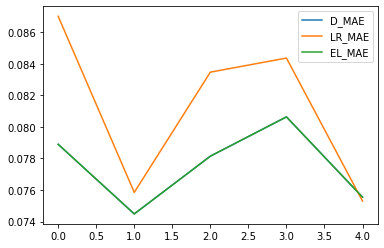

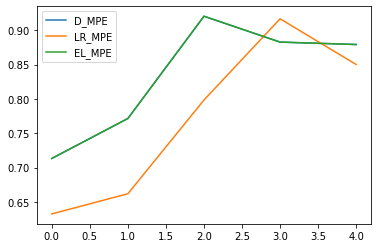

In [266]:
scores.loc[:,scores.columns.str.contains('MAE')].plot()
scores.loc[:,scores.columns.str.contains('MPE')].plot()
#plt.ylim(0,2)
#plt.show()
#plt.ylim(0,2)
plt.show()

In [274]:
def plot_train_test(algo, pred=predictions, y_true=y):
    fig, ax = plt.subplots(2, 3, figsize=(20, 16))
    
    ax[0,0].set_title('1st Train Set')
    ax[0,0].set_xlabel('Time (hs)')
    ax[0,0].set_ylabel('Sum of Motion')
    ax[0,0].plot(predictions[algo + '_y_pred1'], c='red', label='Prediction')
    ax[0,0].plot(y[21375:42746], c='blue', label='Actual')
    plt.ylim(0,2)
    ax[0,0].legend()

    ax[0,1].set_title('2nd Train Set')
    ax[0,1].set_xlabel('Time (hs)')
    ax[0,1].set_ylabel('Sum of Motion')
    ax[0,1].plot(predictions[algo + '_y_pred2'], c='red', label='Prediction')
    ax[0,1].plot(y[42747:64117], c='blue', label='Actual')
    ax[0,1].legend()

    ax[0,2].set_title('2nd Train Set')
    ax[0,2].set_xlabel('Time (hs)')
    ax[0,2].set_ylabel('Sum of Motion')
    ax[0,2].plot(predictions[algo + '_y_pred2'], c='red', label='Prediction')
    ax[0,2].plot(y[64118:85488], c='blue', label='Actual')
    ax[0,2].legend()

    ax[1,0].set_title('2nd Train Set')
    ax[1,0].set_xlabel('Time (hs)')
    ax[1,0].set_ylabel('Sum of Motion')
    ax[1,0].plot(predictions[algo + '_y_pred2'], c='red', label='Prediction')
    ax[1,0].plot(y[85489:106859], c='blue', label='Actual')
    ax[1,0].legend()

    ax[1,1].set_title('2nd Train Set')
    ax[1,1].set_xlabel('Time (ms)')
    ax[1,1].set_ylabel('Sum of Motion')
    ax[1,1].plot(y[106859:128230], c='blue', label='Actual')
    ax[1,1].plot(predictions[algo + '_y_pred2'], c='red', label='Prediction')
    ax[1,1].legend()
    plt.ylim(0,2)
    plt.show()

In [ ]:
[    0     1     2 ... 21373 21374 21375] [21376 21377 21378 ... 42744 42745 42746]
[    0     1     2 ... 42744 42745 42746] [42747 42748 42749 ... 64115 64116 64117]
[    0     1     2 ... 64115 64116 64117] [64118 64119 64120 ... 85486 85487 85488]
[    0     1     2 ... 85486 85487 85488] [ 85489  85490  85491 ... 106857 106858 106859]
[     0      1      2 ... 106857 106858 106859] [106860 106861 106862 ... 128228 128229 128230]

In [269]:
tscv.split(X)

<generator object TimeSeriesSplit.split at 0x00000292AAC243C0>

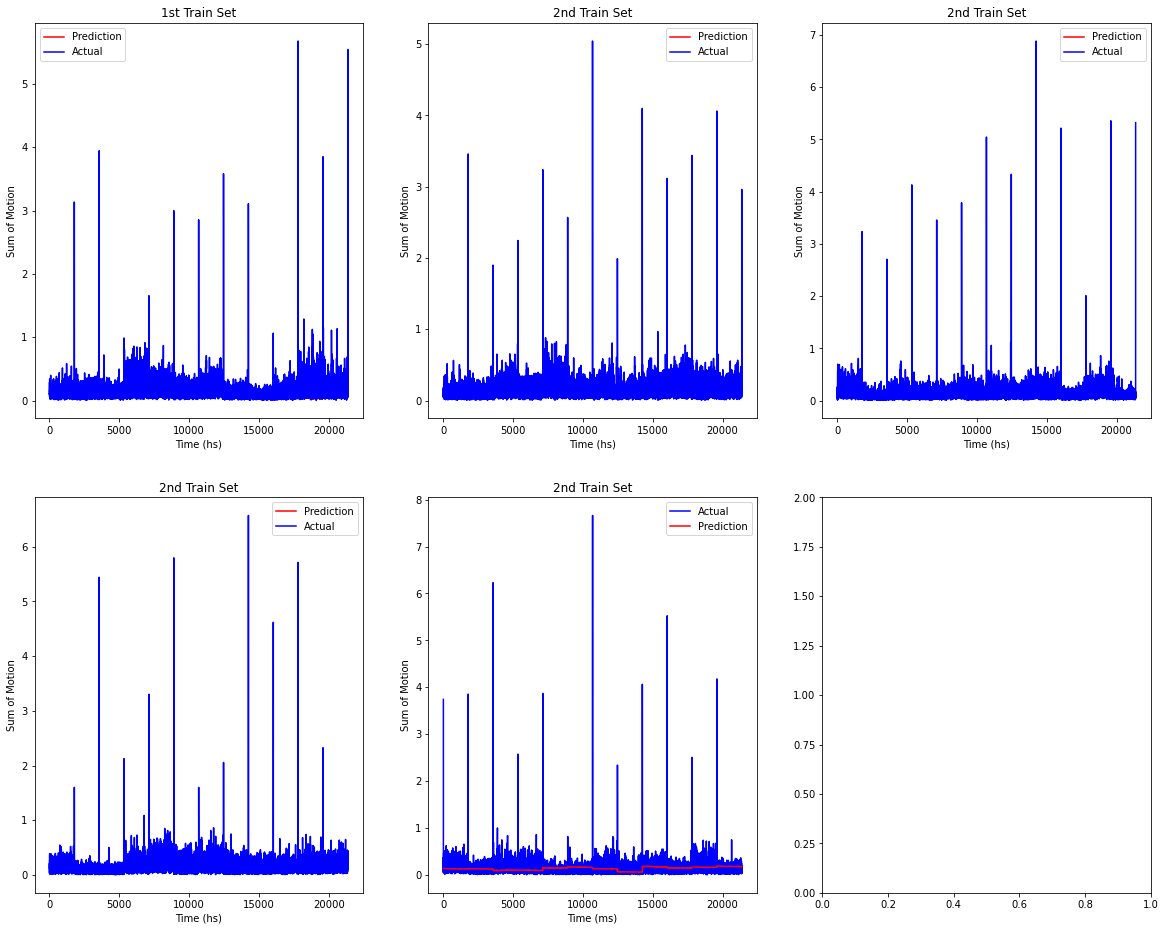

In [275]:
plot_train_test('LR')

In [141]:
count=1
X_train = {}
X_test = {}
y_train = {}
y_test = {}
y_pred = {}
for train_index, test_index in tscv.split(X):
    X_train[count], X_test[count] = X[train_index], X[test_index]
    y_train[count], y_test[count] = y[train_index], y[test_index]
    lin.fit(X_train[count], y_train[count])
    y_pred['LR'+'y_pred'+str(count)] = lin.predict(X_test[count])
    count+=1

In [ ]:
predictiontemp[algo + '_y_pred' + str(count)].append(y_pred)
        scoretemp[algo + '_R2'].append(r2_score(y_test, y_pred))
        scoretemp[algo + '_MAE'].append(mean_absolute_error(y_test, y_pred))
        scoretemp[algo + '_MSE'].append(mean_squared_error(y_test, y_pred))
        scoretemp[algo + '_MPE'].append(mean_absolute_error(y_test, y_pred))
        count+=1
    predictiontemp = pd.DataFrame.from_dict(predictiontemp)
    scoretemp = pd.DataFrame(scoretemp)
    return scoretemp, predictiontemp